In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv('FullData.csv')
df.columns = df.columns.str.strip()
df = df.drop(columns=['Others','Family.History', 'CO', 'Diagnosis', 'Life.Style', 'Sleep', 'Category', 'Age.Group'])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('Mortality', axis=1)
y = df['Mortality']

categorical_columns = X.select_dtypes(include=['object']).columns

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = onehot_encoder.fit_transform(X[categorical_columns])

X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(categorical_columns))

X_final = pd.concat([X.drop(categorical_columns, axis=1), X_encoded_df], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=75)

svm_classifier = SVC(kernel='rbf', random_state=75)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

Testing Accuracy: 0.8648648648648649
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        58
           1       0.80      0.50      0.62        16

    accuracy                           0.86        74
   macro avg       0.84      0.73      0.77        74
weighted avg       0.86      0.86      0.85        74



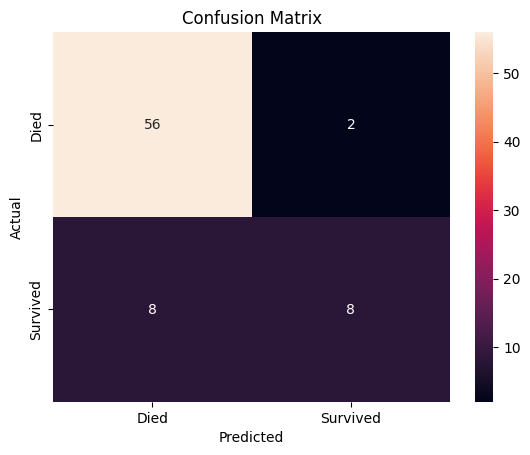

Confusion Matrix:
[[56  2]
 [ 8  8]]


In [6]:
print("Testing Accuracy:", svm_classifier.score(X_test, y_test))

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, 
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))